In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [4]:
train_dir = r"/content/drive/MyDrive/FACE_MASK_DETECTION"

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 1560 images belonging to 2 classes.
Found 390 images belonging to 2 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10  # You can increase this for better results
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 529s 11s/step - accuracy: 0.7399 - loss: 0.4585 - val_accuracy: 1.0000 - val_loss: 0.0066
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 238s 5s/step - accuracy: 0.9978 - loss: 0.0119 - val_accuracy: 1.0000 - val_loss: 8.8899e-04
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 261s 5s/step - accuracy: 0.9994 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 4.7856e-04
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 237s 5s/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9974 - val_loss: 0.0027
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 244s 5s/step - accuracy: 1.0000 - loss: 9.6970e-04 - val_accuracy: 1.0000 - val_loss: 9.6276e-05
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 254s 5s/step - accuracy: 0.9992 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 5.3240e-04
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 262s 5s/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 7.2468e-05
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 245s 5s/step - accuracy: 1.0000 - loss: 1.7917e-

In [7]:
model.save("myfirstmodel.h5")

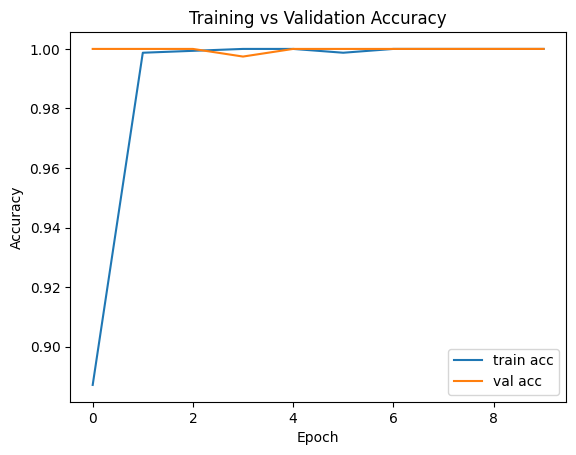

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.show()
